<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.integrate as integrate

simulatedObjects = []


,0,1
0,0,0
1,1,1
2,2,4
3,3,9


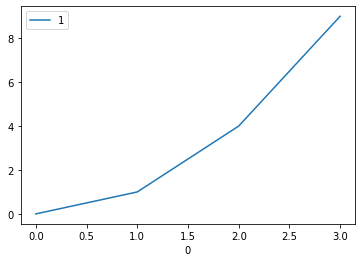

In [4]:
import pandas as pd

def displayData(data):
  display(pd.DataFrame(data))

def plotData(data, x = 0, y = 1, ax = None):
  df = pd.DataFrame(data)
  #display(df)
  newax = None
  if ax is None:
    newax = df.plot.line(x = 0, y = y)
  else:
    newax = df.plot.line(x = 0, y = y, ax = ax)
  return newax

#example of use
data = [(0, 0), (1, 1), (2, 4), (3, 9)]
plotData(data)
displayData(data)


$\left(\right)$

In [0]:
from math import sqrt
import numpy as np

def to3D(x, y, z):
  return [x, y, z]

def sub3D(x, y):
  result = [x[0] - y[0], x[1] - y[1], x[2] - y[2]]
  return result

def abs3D(x):
  return sqrt(x[0] * x[0] + x[1] * x[1] + x[2] * x[2])

def normalize3D(x):
  xAbs = Abs3D(x)
  result = To3D(x[0] / xAbs, x[1] / xAbs, x[2] / xAbs)
  return result

def flying(time, state, input):
  currentInput = input()
  
  currentVelocity = np.array([state[0], state[1], state[2]])
  currentVelocityAbs = abs3D(currentVelocity)
  
  currentPosition = np.array([state[3], state[4], state[5]])
  targetPosition = np.array([currentInput[0], currentInput[1], currentInput[2]])

  wantedVelocity = targetPosition - currentPosition
  wantedVelocityAbs = 1
  wantedVelocity = wantedVelocity * currentVelocityAbs / wantedVelocityAbs

  neededAcceleration = wantedVelocity - currentVelocity

  result = [*neededAcceleration, *currentVelocity]
  return result


In [0]:
def createFixedTarget(x, y, z):
  def fixedPoint():
    return [x, y, z]
  return fixedPoint

def createPlane(destination, stateFunctionEx = flying):
  def stateFunction(time, state):
    return stateFunctionEx(time, state, destination)


In [0]:
def compute(model, state0, t0 = 0.0, t_bound = 10, max_step = 0.05):
  solver = integrate.RK45(fun = model, t0 = t0, y0 = state0, t_bound = t_bound, max_step = max_step)

  while True:
    message = solver.step()
    currentItem = {'time': solver.t, 'state': [*solver.y], 'stateD': [*model(solver.t, solver.y)]}

    yield currentItem
    if (not(solver.status == 'running')):
        break

  return

def prepareSimulation(systemList, t0 = 0.0, t_bound = 10, max_step = 0.05):
  for system in systemList:
    system['solver'] = compute(system['model'], system['state0'], t0 = t0, t_bound = t_bound, max_step = max_step)
    system['state'] = system['state0']

def simulate(systemList):
  for system in systemList:
    system['state'] = next(system['solver'])


In [9]:
def movingObj(time, state):
  veloctity = state[:3]
  position = state[3:]
  acceleration = [0, 0, 0]
  return [*acceleration, *position]



[4, 5]
